## !! Importing libraries, modules and pre-reqs

In [3]:
# Pre-reqs and libraries to import
import sys
sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\2.PatternReg.ML\\introduction_to_ml_with_python')
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Function to display methods and hide special methods
def print_methods(obj):
    methods = [method for method in dir(obj) if not method.startswith("__") and not method.startswith("_") and callable(getattr(obj, method))]
    for method in methods:
        print(method)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

## Chapter 2 - Supervised Learning
Supervised learning is used to predict an outcome from a given input of data, and we have examples of input and output pairs.  
We build a machine learning model from these input and output pairs. This is our training data set.  
The goal is to make accurate predictions for new never before seen data.

## Classification and Regression 
There are two major types of supervised machine learning problems.  
The goal of classification is to predict a "Class label". There can be a Binary Classification (Yes or no question) or Multiclass Classification. 
The Iris problem from Chapter 1 is a multiclass classification problem.  

### Regression
The goal here; predict a continuous number, or a floating point number in programming terms (or a real number in mathematical terms).  
Predicting a person's salary off their resume details is an example of regression.  
Predicting house prices based off property attributes is another example of regression.  
Regression appears to be used when predicting an amount, as mentioned above.  

### Distinguishing between classification and regression
Is there some kind of continuity in the output?  
Think about predicting house prices, there is a clear continuity in the output. The prediction of 200,000 or 200,500 for a property doesn't really separate it into a right or wrong category.  
However when identifying Iris categories or the language of a website, then there is no matter of degree. The iris is of one type or another, the language is either French or Egnlish. There isn't any inbetween.

## Generalization, Overfitting and Underfitting
We want to create a model that is able to Generalize as accurately as possible.  
In Supervised Learning, a model is built and configured on the Training Data, and built so it can make outcome predictions on new unseen data. If the model can make accurate and correct predictions, we say the model is able to Generalize from the Training set to the Test set.  

Summarising the example dataset of customers wanting to buy a boat - we can "overfit" our model to the attribute in the Training set.  

The only measure of whether an algorithm will perform well on new data is the evaluation on the test set.  

"We always want to find the simplest model".  

Building a model that is too complex for the amount of data we have is called Overfitting.  

Building a model that is then too simple is called Underfitting.  

The more complex we allow the model to be, the better it'll be able to predict and perform on the Training Data. However, if the model becomes too complex, and become customised towards our Training Data. "Focussing too much on individual data points" then the model will not Generalize well to new data.  

"There is a sweet spot that will return the best generalization performance, this we want to find". The trade off is showen below:  

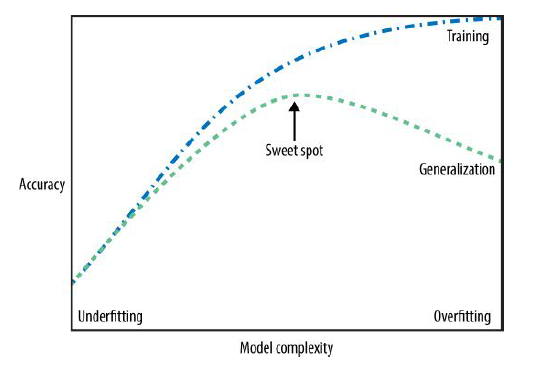

### Relation of Model Complexity to Dataset Size
The model complexity is "intimately tied" to the variety of Training Data inputs.  

The larger the variety of data points you have, the more complex a model you can build without overfitting.  

However, duplicating data or collecting similiar data will not help lol.  

In the boat example - if we have a model that is overfitted to the 12 rows of customer Training Data. Then we added 10,000 more rows of customer Training data. Our model all of a sudden isn't overfitted, and we'd be more likely to believe our model is configured appropriately.  

"Never underestimate the power of more data."  

## Supervised Machine Learning Algorithms
The most popular learning algorithms and how they make predictions is shown next.  
Model Complexity is also discussed / which data the models can be applied to / important parameters and options.  
Many algorithms have a classification and regression variant.  


## Some sample datasets
### Forge dataset - Synthetic (meaning made-up) Two Classification dataset

In [ ]:
X, y = mglearn.datasets.make_forge()
forge = mglearn.datasets.make_forge()

print("!! Dataset class type below:")
print(type(X))
print("!! Features below:")
print(" X Axis below | Y Axis below")
print(X[:2]) 
print("!! Label classes below:")
print(y[:2]) 

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y[:])
plt.legend(["Class 0", "Class 1"], loc=4)
print(X.shape)

## Regression Wave dataset - synthetic

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print("X variable")
print(type(X))
print(f"{X.shape} means the array has three rows and one column. A 2D array, with 3 elements along the first axis (rows) and 1 element along the second axis (columns)")
print("The array has three rows and one column")
print(X)

print("\n")

print("y variable")
print(type(y))
print(f"{y.shape} means the array is one-dimensional and is a vector.")
print("The vector is just a single row - and no columns?")
print(y)


In [ ]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("X Feature")
plt.ylabel("y Target")

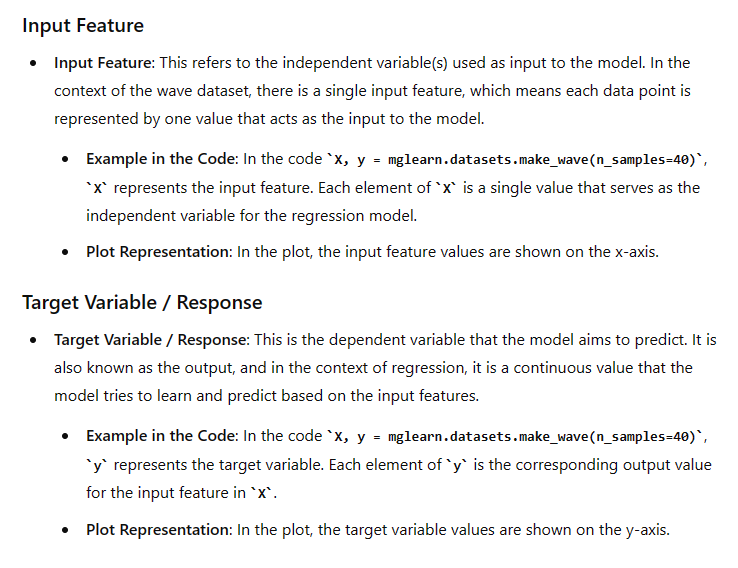

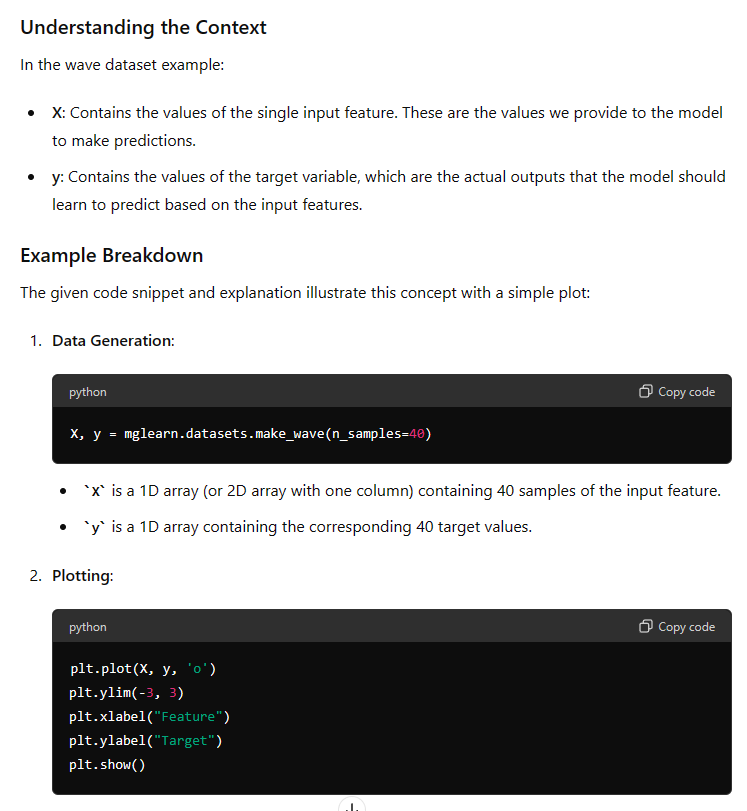

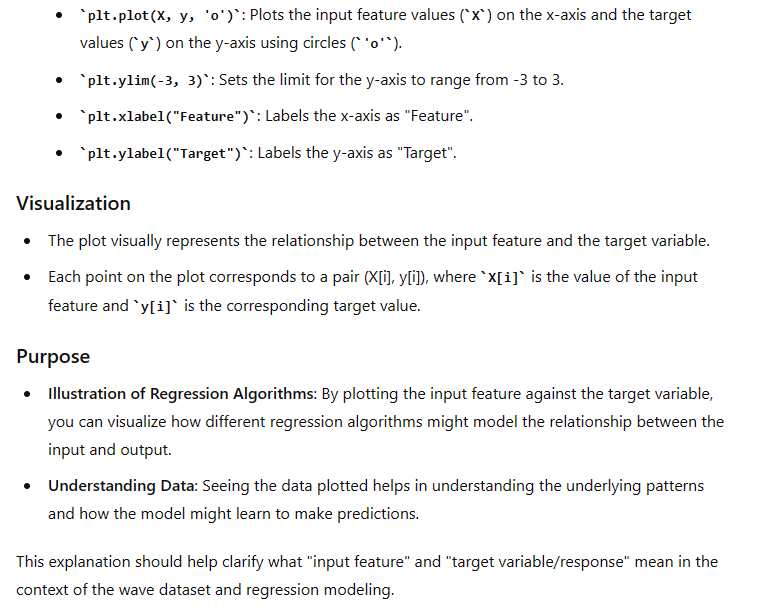

## Breast Cancer - real world

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# print(cancer.keys())
print(dir(cancer))
print(type(cancer))
print(cancer.DESCR)

In [ ]:
print(dir(cancer))
# print(dir(cancer.data))
print(cancer.data.shape)
print(cancer.feature_names)

In [ ]:
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

## Boston Housing Dataset - real world

In [7]:
# from sklearn.datasets import load_boston
# boston = load_boston()
# print("Data shape: {}".format(boston.data.shape))

# from sklearn.datasets import fetch_openml
# housing = fetch_openml(name="house_prices", as_frame=True,parser='auto')
# print("Data shape: {}".format(housing.data.shape))

Data shape: (1460, 80)


In [8]:
# print(housing)
# X, y = mglearn.datasets.load_extended_boston()
# print("X.shape: {}".format(X.shape))

HTTPError: HTTP Error 404: Not Found

## k-Nearest Neighbors

k-NN is one of the simplest machine learning algorithms. Building a model is done by storing the training dataset. To make a prediction the algorithm finds the closest data points in the training dataset - it's nearest neighbors.

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

The test data is plotted more or less, and it's nearest neighbor is found, and the test predictions are determined by the name of their nearest neighbor. Hence their color changing to either orange or blue.

We can then increase the amount of neighbors we match to and then vote on what the test prediction is most likely to be - note we have k neighbors of 3 below:

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Note the color being assigned based on their neighbors

## Using scikit-learn on forge dataset - split training and test

In [ ]:
# Checking out the forge dataset
mglearn.datasets.make_forge()
# We can see that its actually two arrays - one is a matrix and the other is a vector

## Declaring Train X and y datasets, and Test X and y datasets

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge() # here we assign the matrix to X and the vector to y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Above we assign 75% of X to X_Train and 25% to X_Test, likewise for y
print(y_test)

## Fitting the Forge Training dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# clf stands for classifier, and this is a classification problem and we're using the classification varient of the kNN algorithm.
clf
print(dir(clf))

In [ ]:
# Example usage:
print_methods(clf)


In [ ]:
# Fitting the data, meaning we are going to store the data in the kNN classification algorithm.
clf.fit(X_train, y_train)

## Predicting Test X dataset 

In [ ]:
print(X_test)

In [ ]:
clf.predict(X_test)

In [ ]:
# By using the example plot below - I can check the X_test coordinate,
# and see if the position is closest to a class 0 data point or class 1

mglearn.plots.plot_knn_classification(n_neighbors=3)

## Evaluating model - Generalize score
## Test X matrix / y Vector

In [ ]:
print(X_test) # Test coordinates

In [ ]:
print(y_test) # Test classes

In [ ]:
clf.score(X_test, y_test) # The model is 86% accurate

# Analyzing KNeighborsClassifier

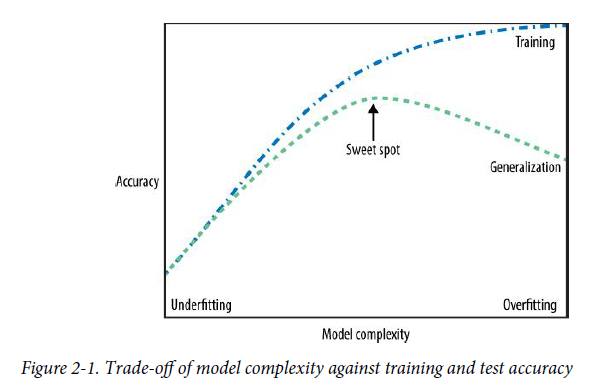

## Creating a decision boundary - page 37

In [ ]:
print(len(X))
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 26], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

## Breast Cancer - evaluating on neighbor counts

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## k-neighbors regression variant - wave dataset

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn. It’s used similarly to KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

Now we can make predictions on the test set:

In [ ]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

# R2 score, also known as the coefficient of determination
We can also evaluate the model using the score method, which for regressors returns
the R2 score. The R2 score, also known as the coefficient of determination, is a measure
of goodness of a prediction for a regression model, and yields a score between 0
and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses, y_train:

In [ ]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

## Analyzing KNeighborsRegressor

As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
# print(line)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

## Strengths, weaknesses, and parameters

Two important parameters to the KNeighbors classifier: the
number of neighbors and how you measure distance between data points.

Using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter. Choosing the right distance measure is somewhat
beyond the scope of this boo  
By default, Euclidean distance is used, which works 
well in many settings.k.

Strengths of k-NN:
The model is very easy to understand, and gives reasonable performance without adjustments. Using this algorithm is a good baseline method before considering more advanced techniques.Building the nearest neighbors model is usually very fast
st,

When your training set is very 
large (either in number of features or in number of samples) prediction can be slow 
When using the k-NN algorithm, it’s important to preprocess your da
3). This approach often does not perform well on datasets with many featu es
(hundreds or more), and it does particularly badly with datasets where most feat res
are 0 most of the time (so-called sparse datasets).

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used
in practice, due to prediction being slow and its inability to handle many features.
The method we discuss next has neither of these drawbacks.

# Linear Regression - page 45

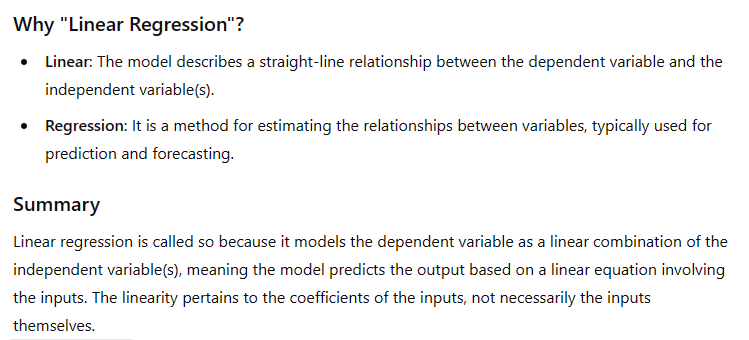
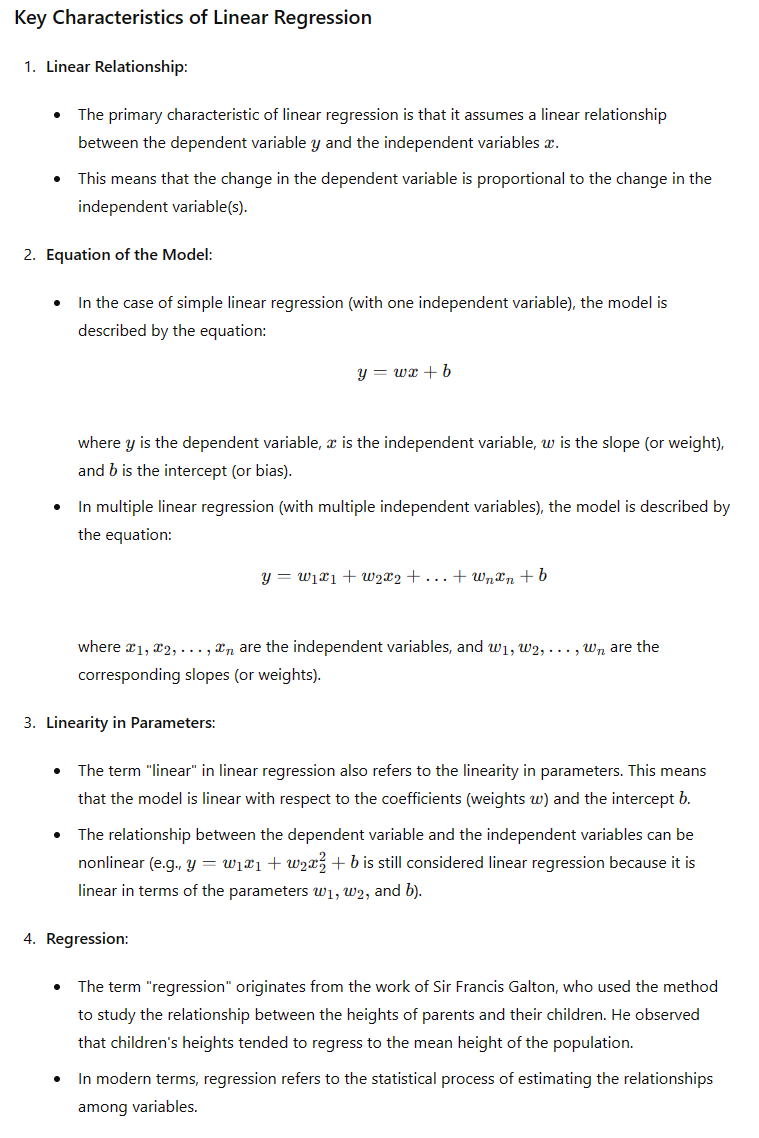
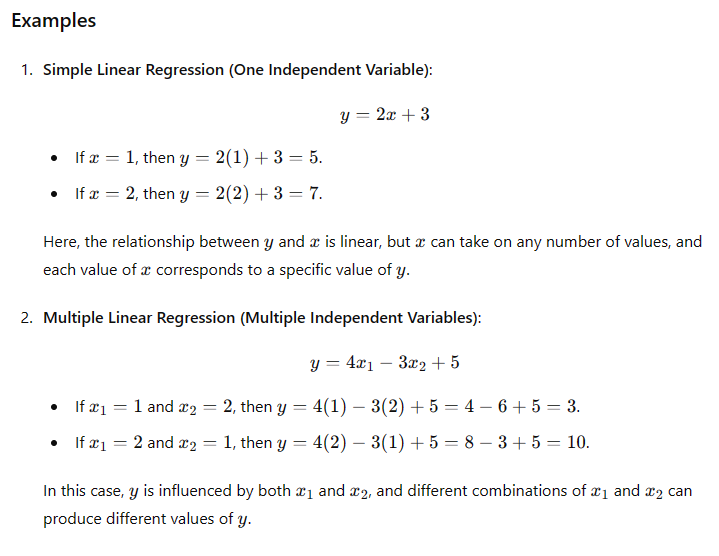
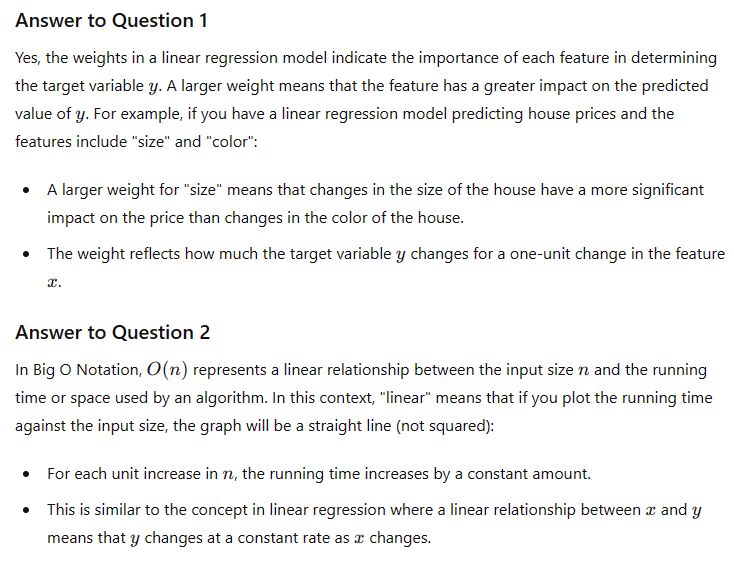

In [ ]:
# y = w*x + b
# If 𝑥 = 0, then 𝑦 = 𝑏. 
# The intercept b is the value of y when all x values are zero. In a simple linear regression equation

## Linear models for regression

w[0]: 0.393906  b: -0.031804


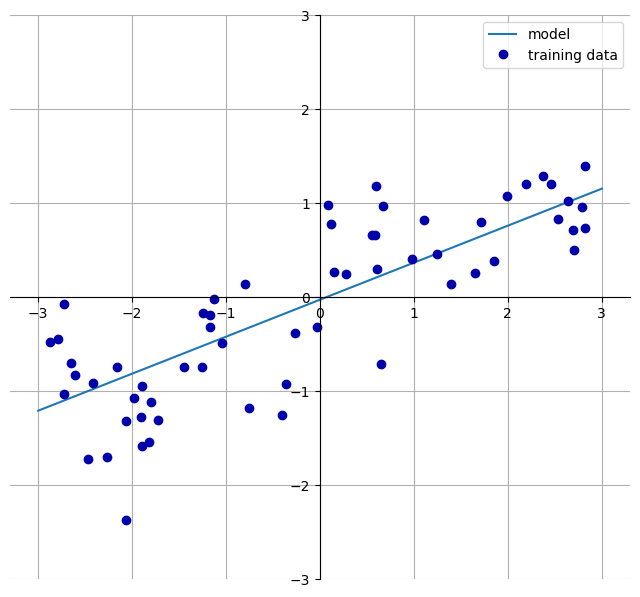

In [53]:
mglearn.plots.plot_linear_regression_wave()

### Understanding "w" as the slope and coefficient.
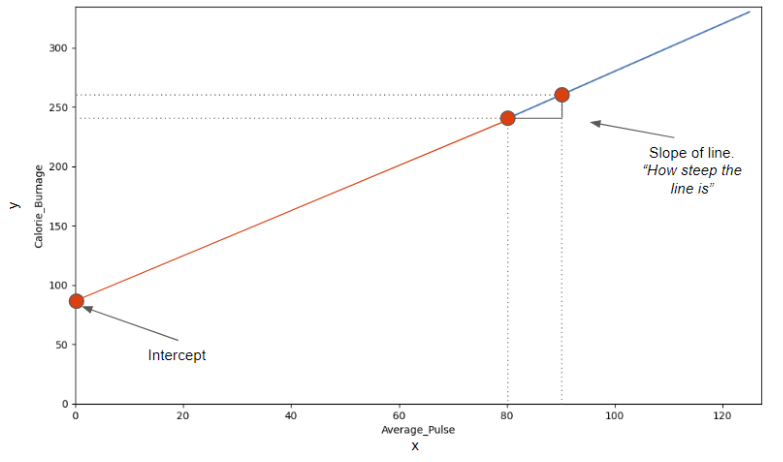

#### Types equations
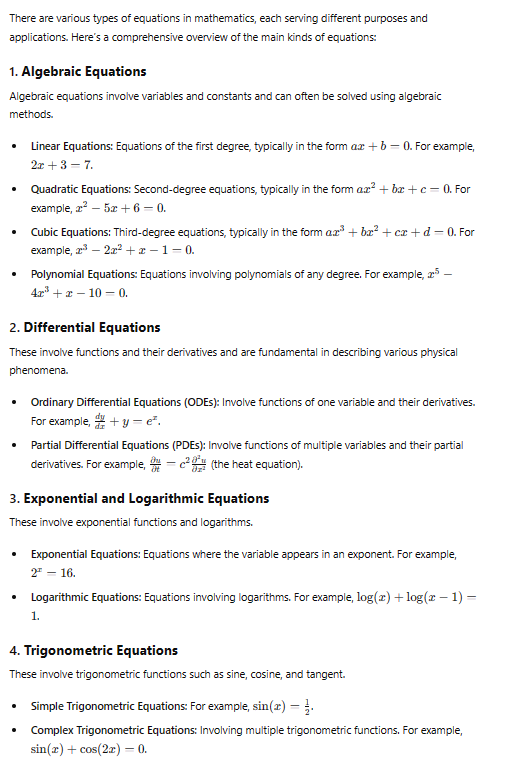
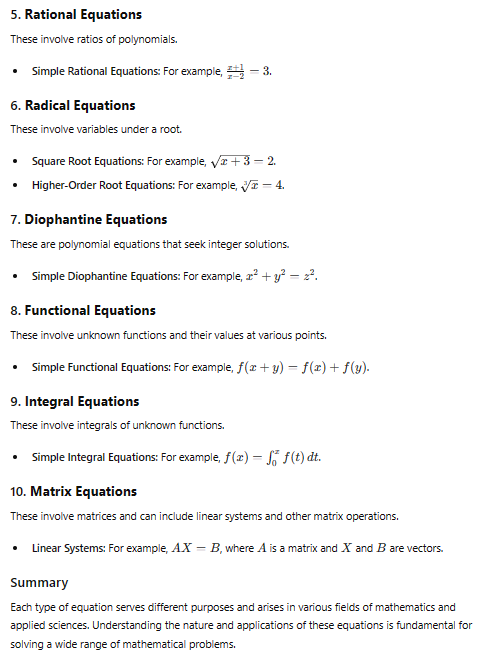

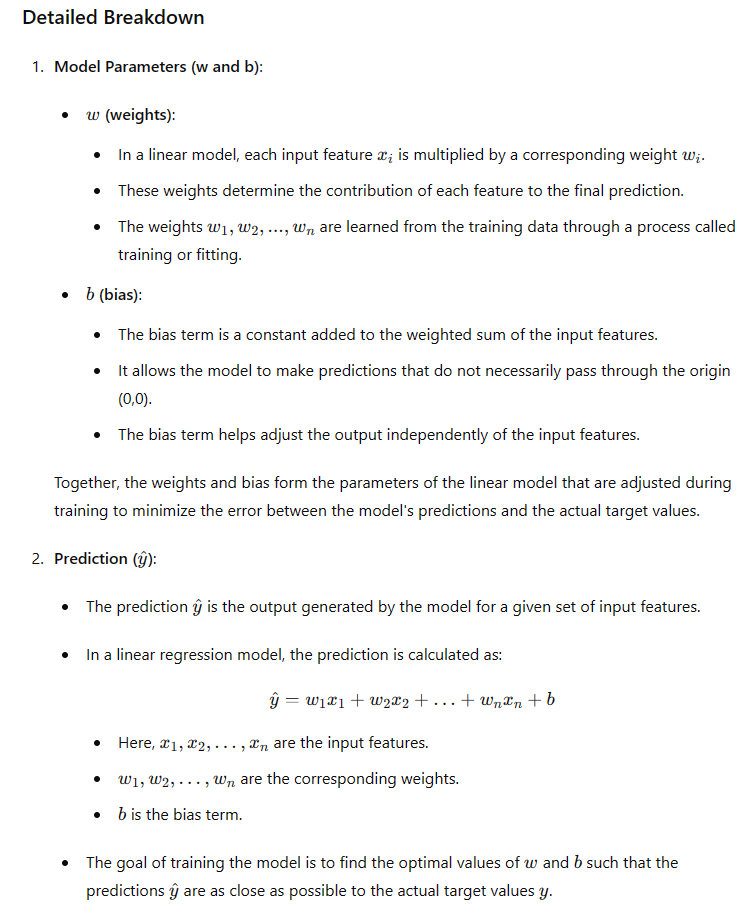

Weights 𝑤 and bias 𝑏 are parameters of a linear model that are determined by the training data.  

The final values of 𝑤 and 𝑏 represent the learned parameters that define the relationship between the input features and the target variable, allowing the model to make accurate predictions on new data.

# Types of Linear Models - page 47

## Linear Regression (Ordinary Least Squares)

In [52]:
# Linear Regression (Ordinary Least Squares) - page 47
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

# The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
# attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


You might notice the strange-looking trailing underscore at the end
of coef_ and intercept_. scikit-learn always stores anything
that is derived from the training data in attributes that end with a
trailing underscore. That is to separate them from parameters that
are set by the user.  

The intercept_ attribute is always a single float number, while the coef_ attribute is
a NumPy array with one entry per input feature. As we only have a single input feature
in the wave dataset, lr.coef_ only has a single entry.

In [5]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


#### !! Declare Cancer data set (instead of Ames Housing dataset)

In [58]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True,parser='auto')
# print("Data shape: {}".format(housing.data.shape))

# Separate the features (X) and the target (y)
X = housing.data
y = housing.target

# print(X.shape)
# print(y.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Using load_breast_cancer instead of Ames housing.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Train the Linear Regression model
lr = LinearRegression().fit(X_train, y_train)
print("LR Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("LR Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))


(426, 30)
(426,)
(143, 30)
(143,)
LR Training set score: 0.79
LR Test set score: 0.67
lr.coef_: [ 6.61979655e-02  2.90231325e-04  1.22104348e-02 -8.47821631e-04
  4.82193696e-01  2.50515225e+00 -1.71646173e+00 -1.59150719e+00
 -2.08456831e-01  3.65691611e+00 -6.69572719e-01  2.50682659e-02
  1.14387141e-01 -5.51974915e-04 -2.73284156e+01  5.60746746e-01
  2.44352766e+00 -6.69241274e+00 -5.28167829e+00  1.95909109e+01
 -1.81211342e-01 -1.00146516e-02 -1.03668337e-02  1.40243516e-03
  4.93497684e-01 -3.51900757e-02 -1.83039588e-01 -9.65513149e-01
 -3.00770047e-02 -6.65033208e+00]
lr.intercept_: 2.7578756720506785
Number of features used: 30


#### Ridge Regression and Regularization
The magnitude of coefficients
to be as small as possible; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explicitly
restricting a model to avoid overfitting. The particular kind used by ridge regression
is known as L2 regularization.7

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train) # Default Alpha 1.0
print("Ridge Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))

Ridge Training set score: 0.75
Ridge Test set score: 0.70
ridge.coef_: [ 0.19110445 -0.0045645   0.00724348 -0.00176874 -0.13532344 -0.00963101
 -0.20850312 -0.24278126 -0.13020853 -0.00758686 -0.19953774 -0.02604849
  0.05452969 -0.00184035 -0.05988369  0.0689408   0.19602195 -0.03072163
 -0.0600722   0.00945035 -0.2746797  -0.00574708 -0.00392086  0.00178668
 -0.31672737 -0.12076578 -0.29656729 -0.42196671 -0.33051964 -0.07317635]
ridge.intercept_: 2.370175189636271


With linear
regression, we were overfitting our data. Ridge is a more restricted model, so we are
less likely to overfit. A less complex model means worse performance on the training
set, but better generalization. As we are only interested in generalization performance,
we should choose the Ridge model over the LinearRegression model.  

The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter.  

In the previous example, we used the default parameter
alpha=1.0. There is no reason why this will give us the best trade-off, though.
The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization. For example:

In [45]:
ridge10 = Ridge(alpha=100).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
print("ridge.coef_: {}".format(ridge10.coef_))
print("ridge.intercept_: {}".format(ridge10.intercept_))

Training set score: 0.70
Test set score: 0.66
ridge.coef_: [ 0.02721512  0.01100261 -0.001597    0.00021556 -0.00381704 -0.00774697
 -0.01456921 -0.00679088 -0.00625712 -0.00139215 -0.01073149  0.00505785
  0.0075875  -0.0014181  -0.00080565 -0.0014186  -0.00299463 -0.00091607
 -0.00135881 -0.00025836 -0.04638371 -0.01991206 -0.01791575  0.00071976
 -0.00787853 -0.02663072 -0.04301303 -0.01360605 -0.01594031 -0.00456156]
ridge.intercept_: 2.652324154509313


Decreasing alpha allows the coefficients to be less restricted, meaning we move right
in Figure 2-1. For very small values of alpha, coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression:

In [57]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
print("ridge.coef_: {}".format(ridge01.coef_))
print("ridge.intercept_: {}".format(ridge01.intercept_))
print("Number of features used: {}".format(np.sum(ridge01.coef_ != 0)))

Training set score: 0.77
Test set score: 0.71
ridge.coef_: [ 5.42029715e-02 -1.04202758e-02  1.96941564e-02 -1.38549622e-03
 -1.98465369e-01  6.42383894e-01 -6.10464773e-01 -8.31656910e-01
  3.50750558e-03  6.84620071e-02 -4.39798798e-01 -2.75928224e-02
  6.43680224e-02 -8.14886926e-04 -4.71431534e-01  1.44998387e-01
  1.08080543e+00 -2.01098725e-01 -4.10484348e-01  3.72524576e-02
 -2.06197194e-01 -1.74525225e-03 -5.74458559e-03  1.48617067e-03
 -1.17793082e+00 -4.75872735e-02 -2.82510053e-01 -1.19180774e+00
 -5.18334344e-01 -4.02859853e-01]
ridge.intercept_: 2.5117155423494264
Number of features used: 30


#### Alpha values
Great alpha value = a more restricted model = coefficients have a smaller magnitude

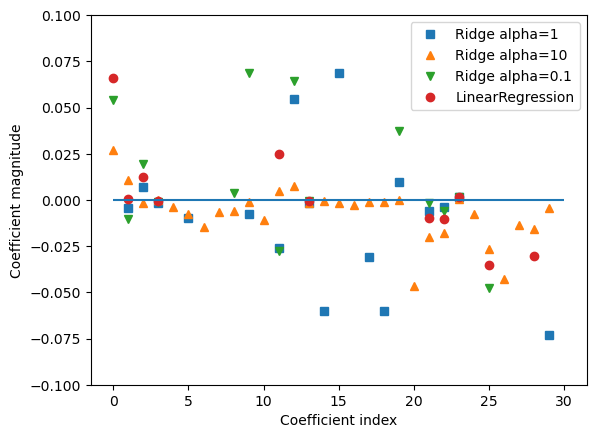

In [50]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-0.10, 0.10)
plt.legend()

Another way to understand the influence of regularization is to fix a value of alpha
but vary the amount of training data available. For Figure 2-13, we subsampled the
Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on
subsets of increasing size (plots that show model performance as a function of dataset
size are called learning curves):

#### Regularization Learning Curve
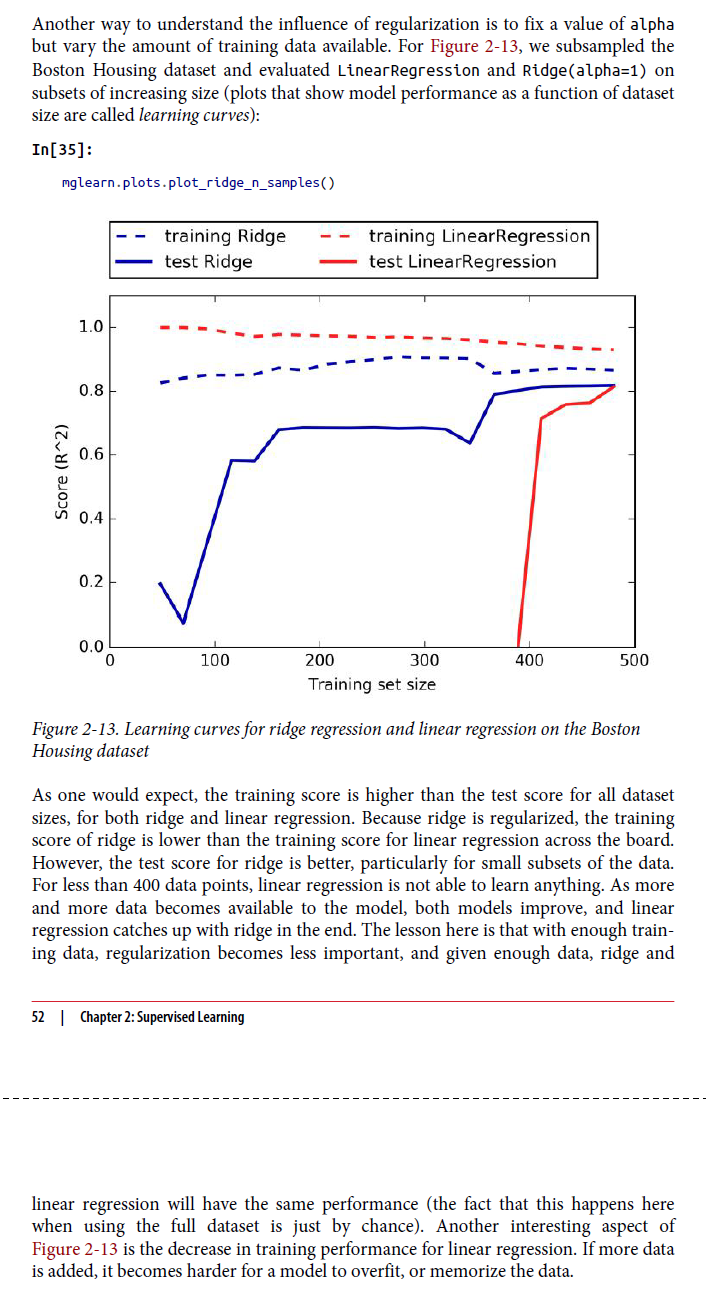

#### Lasso
Another option compared to Ridge for regularization. Restricts coefficients or weights down to zero. Known as L1 Regularization, some weights are exactly zero and are ignored by the model. And results in automatic feature selection. Makes the model easier to interpret and reveals the most important features for the model.

In [56]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.56
Test set score: 0.50
Number of features used: 2


In [59]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.70
Test set score: 0.66
Number of features used: 8


In [60]:
# If we set alpha too low, however, we again remove the effect of regularization and end
# up overfitting, with a result similar to LinearRegression:

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.77
Test set score: 0.72
Number of features used: 22


Text(0, 0.5, 'Coefficient magnitude')

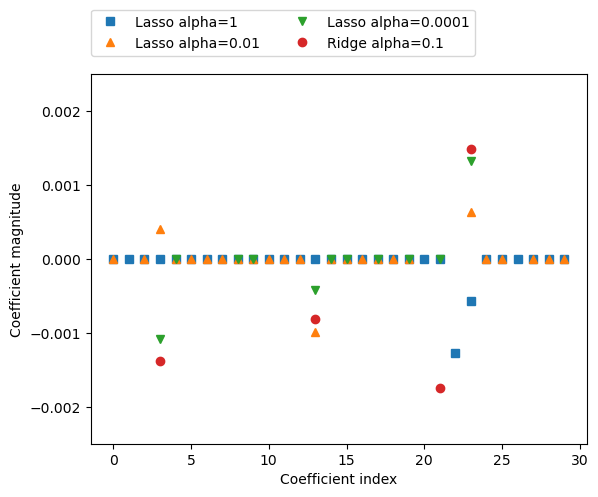

In [65]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-0.0025, 0.0025)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to understand,
as it will select only a subset of the input features

# Linear Models for Classification

ŷ = w[0] * x[0] + w[1] * x[1] + b > 0  

The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we threshold the predicted value at zero.
If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
predict the class +1.  

For linear models for regression, the output, ŷ, is a linear function of the features: a
line, plane, or hyperplane (in higher dimensions).  

For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear
classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.  

We will see examples of that in this section. There are many algorithms for learning linear models. These algorithms all differ in
the following two ways:  
- The way in which they measure how well a particular combination of coefficients
and intercept fits the training data
- If and what kind of regularization they use

## loss functions
Not really sure on these yet

## logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

IndentationError: expected an indented block after 'for' statement on line 5 (1153704601.py, line 6)

## linear support vector machines - SVMs